<a href="https://colab.research.google.com/github/FGalvao77/Como-criar-modelos-de-series-temporais-com-o-PROPHET/blob/main/Como_criar_modelos_de_s%C3%A9ries_temporais_(time_series)_com_PROPHET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Como criar modelos de `séries temporais` (_time series_) com o PROPHET**
---

<font size=5>**Introdução**</font>

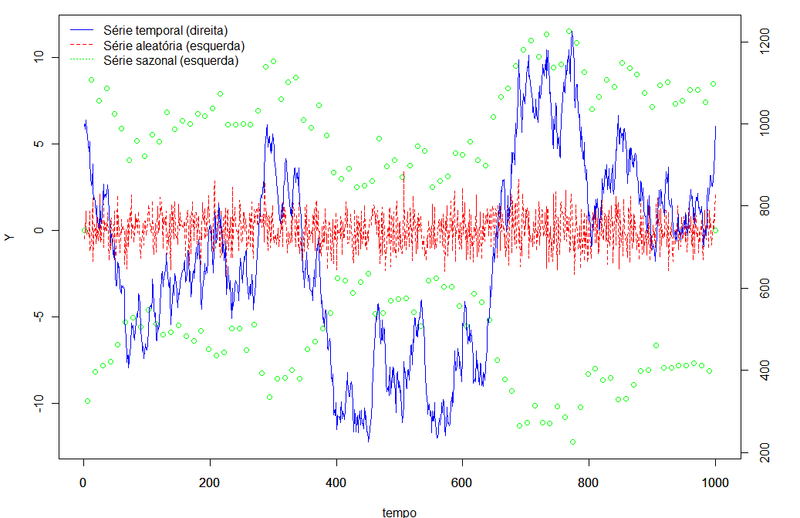

**Série temporal**

Em [estatística](https://pt.wikipedia.org/wiki/Estat%C3%ADstica), [econometria](https://pt.wikipedia.org/wiki/Econometria), [matemática aplicada](https://pt.wikipedia.org/wiki/Matem%C3%A1tica_aplicada) e [processamento de sinais](https://pt.wikipedia.org/wiki/Processamento_de_sinais), uma **série temporal** é uma coleção de observações feitas sequencialmente ao longo do tempo. Em modelos de [regressão linear](https://pt.wikipedia.org/wiki/Regress%C3%A3o_linear) com [dados cross-section](https://pt.wikipedia.org/wiki/Dados_cross-section) a ordem das observações é irrelevante para a análise, em séries temporais a ordem dos dados é fundamental. Uma característica muito importante deste tipo de dados é que as observações vizinhas são dependentes e o interesse é analisar e modelar essa dependência.

As séries temporais existem nas mais variadas áreas de aplicação, como: [finanças](https://pt.wikipedia.org/wiki/Finan%C3%A7as), [marketing](https://pt.wikipedia.org/wiki/Marketing), [economia](https://pt.wikipedia.org/wiki/Economia), seguros, [demografia](https://pt.wikipedia.org/wiki/Demografia), ciências sociais, [meteorologia](https://pt.wikipedia.org/wiki/Meteorologia), [energia](https://pt.wikipedia.org/wiki/Energia), epidemiologia, etc.

- fonte: [Wikipedia](https://pt.wikipedia.org/wiki/S%C3%A9rie_temporal)

Para essa atividade prática, utlizaremos um base de dados de estações metereológicas da região **Sudeste** do Brasil.

**Base de dados:**
- [Kaggle](https://www.kaggle.com/pmr35082020226/an-lise-clim-tica-regi-o-sudeste/data?select=sudeste.csv)

O nosso desafio é, criar um modelo que seja capaz de _estimar_ a temperatura dada uma `série temporal`.

<font size=4>**Prophet**</font>

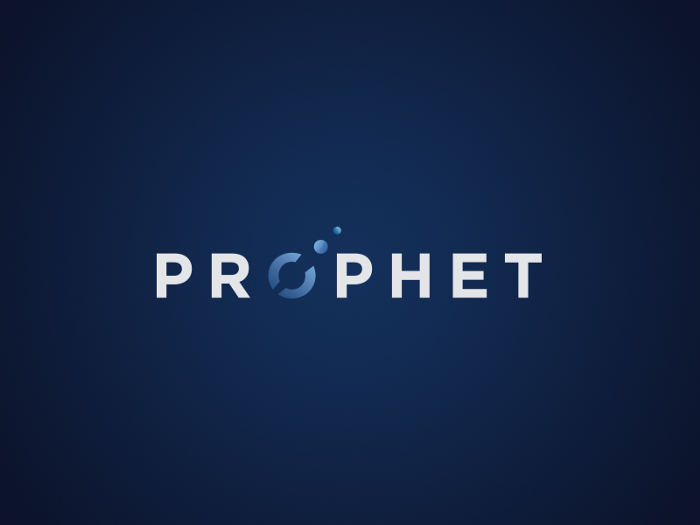

Portanto, utilizaremos a biblioteca `PROPHET` para modelar o nosso modelo.

"_O **Prophet** é um procedimento para prever dados de séries temporais com base em um modelo aditivo em que as tendências não lineares são ajustadas à sazonalidade anual, semanal e diária, além dos efeitos de feriados. Funciona melhor com séries temporais com fortes efeitos sazonais e várias temporadas de dados históricos. O Prophet é robusto a dados ausentes e mudanças na tendência e normalmente lida bem com valores discrepantes._"

- The Python Package Index (PyPI): https://pypi.org/project/fbprophet/
- Docs Prophet: https://facebook.github.io/prophet/


**Resumo**

A previsão é uma tarefa comum de _ciência de dados_ que ajuda as organizações no planejamento de capacidade, definição de metas e detecção de anomalias. Apesar de sua importância, existem sérios desafios associados à produção de previsões confiáveis ​​e de alta qualidade – especialmente quando há uma variedade de séries temporais e analistas com experiência em modelagem de séries temporais são relativamente raros. Para enfrentar esses desafios, descrevemos uma abordagem prática para a previsão “em escala” que combina modelos configuráveis ​​com análise de desempenho do analista no "_circuito_". Propomos um modelo de regressão modular com parâmetros interpretáveis ​​que podem ser ajustados intuitivamente por analistas com conhecimento de domínio sobre a série temporal. Descrevemos análises de desempenho para comparar e avaliar os procedimentos de previsão e sinalizar automaticamente as previsões para revisão e ajuste manual. As ferramentas que ajudam os analistas a usar seus conhecimentos de forma mais eficaz permitem a previsão confiável e prática de séries temporais de negócios $[_1]$.

Segue o link do Paper:
- Paper Prophet: https://peerj.com/preprints/3190/

$[_1]$ - traduzido do Paper original.


In [1]:
# biblioteca para ignorar mensagens de alertas
import warnings
warnings.filterwarnings('ignore')

Como base de desenvolvimento de conhecimento, segue o vídeo-aula do _Kaggle Grandmaster_ [Mario Filho](https://www.mariofilho.com/).

Obs.: realizei alguns adaptações/ajustes para deixar um pouco a minha marca pessoal e meu nível de conhecimento em aplicações de [Ciência de Dados](https://pt.wikipedia.org/wiki/Ci%C3%AAncia_de_dados).

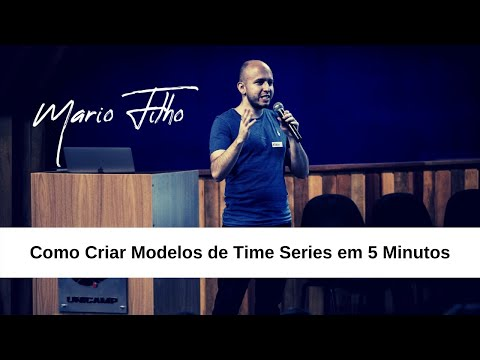

In [2]:
# biblioteca para exibicão do vídeo-aula no ambiente do google colab / jupyter notebook
from IPython.display import YouTubeVideo

# vídeo-aula - Como criar modelos de séries temporais (time series) com PROPHET - Mario Filho
YouTubeVideo('4kWROiUYHBc', width=720, height=360)

In [3]:
# conectando ao google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# visualizando o diretório principal
%ls

drive/  sample_data/


In [5]:
# visualizando do subdiretório "drive"
%ls drive/

MyDrive/


In [6]:
# visualizando o conteúdo da pasta "MyDrive"
%ls drive/MyDrive/

 09.gdoc
 09.pdf
 87.gdoc
 87.pdf
'Apresentação sem título.gslides'
 archive/
 aula3-arq1.csv.gsheet
 Backup-Aqualert
'Boleto (1).pdf'
 Boleto.gdoc
 Boleto.pdf
 cal_housing.data
 celeb_dataset.zip
 certificado.pdf
'Cientista de Dados do zero ao PRO'/
 Classroom/
'Colab Notebooks'/
'CONTRATO RESIDENCIAL ROOSEVELT 102 (1).gdoc'
'CONTRATO RESIDENCIAL ROOSEVELT 102 (1).pdf'
'CONTRATO RESIDENCIAL ROOSEVELT 102.gdoc'
'CONTRATO RESIDENCIAL ROOSEVELT 102.pdf'
'Cópia de airline-passengers (1).csv'
'Cópia de airline-passengers.csv'
'Cópia de algoritmos_de_mineracao (1).ipynb'
'Cópia de algoritmos_de_mineracao.ipynb'
'Cópia de analise_passageiros (1).ipynb'
'Cópia de analise_passageiros.ipynb'
'Cópia de analise_pressao_atmosferica (1).ipynb'
'Cópia de analise_pressao_atmosferica.ipynb'
'Cópia de apresentação.pptx.pdf'
'Cópia de aula_1_FAM (1).ipynb'
'Cópia de aula_1_FAM.ipynb'
'Cópia de aula_2_classes (1).ipynb'
'Cópia de aula_2_classes.ipynb'
'Cópia de aula3-arq1.csv.gsheet'
'

In [7]:
# extraindo o conteúdo do arquivo "sudeste.zip"
!unzip drive/MyDrive/sudeste.zip

Archive:  drive/MyDrive/sudeste.zip
  inflating: sudeste.csv             


In [8]:
# visualizando o arquivo
!head sudeste.csv

wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,yr,mo,da,hr,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
178,SÃO GONÇALO,237.00,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 00:00:00,2007-11-06,2007,11,6,0,,982.5,982.5,981.3,,29.3,12.1,29.7,16.8,25.5,10.8,35.0,58.0,32.0,3.2,101.0,6.5
178,SÃO GONÇALO,237.00,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 01:00:00,2007-11-06,2007,11,6,1,,983.2,983.2,982.5,,29.0,13.5,29.9,13.6,29.0,12.2,39.0,39.0,35.0,3.6,94.0,6.4
178,SÃO GONÇALO,237.00,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 02:00:00,2007-11-06,2007,11,6,2,,983.5,983.5,983.2,,27.4,14.0,29.0,14.0,27.4,13.6,44.0,44.0,39.0,2.5,93.0,6.9
178,SÃO GONÇALO,237.00,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 03:00:00,2007-11-06,2007,11,6,3,,983.7,983.7,983.4,,25.8,16.9,27.4,16.9,25.8,14.1,58.0,58.0,44.0,1.7,96.0,5.8
178,SÃO GONÇALO,237.00,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 04:00:00,2007-11-06,2007,11,6,4,,983.7,9

In [9]:
# importando as bibliotecas e funções
# %pylab inline
import pandas as pd
import numpy as np

from fbprophet import Prophet

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [10]:
# instanciando o conjunto de dados na variável "data"
data = pd.read_csv('/content/sudeste.csv', parse_dates=['mdct', 'date'])   
                                        # passando no argumento "parse_dates" as colunas de datas, nesse caso, "mdct" e "date"

# ordenando os dados pela coluna "mdct"
data.sort_values('mdct', inplace=True)

In [11]:
# setando a quantidade máxima de colunas para exibição
pd.set_option('display.max_columns', 31)

# visualizando as 5 primeiras observações
data.head()

,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,yr,mo,da,hr,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
5493152,371,ECOLOGIA AGRÍCOLA,35.0,-22.757868,-43.684843,A601,Seropédica,RJ,2000-05-24 00:00:00,2000-05-24,2000,5,24,0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5493153,371,ECOLOGIA AGRÍCOLA,35.0,-22.757868,-43.684843,A601,Seropédica,RJ,2000-05-24 01:00:00,2000-05-24,2000,5,24,1,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5493154,371,ECOLOGIA AGRÍCOLA,35.0,-22.757868,-43.684843,A601,Seropédica,RJ,2000-05-24 02:00:00,2000-05-24,2000,5,24,2,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5493155,371,ECOLOGIA AGRÍCOLA,35.0,-22.757868,-43.684843,A601,Seropédica,RJ,2000-05-24 03:00:00,2000-05-24,2000,5,24,3,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5493156,371,ECOLOGIA AGRÍCOLA,35.0,-22.757868,-43.684843,A601,Seropédica,RJ,2000-05-24 04:00:00,2000-05-24,2000,5,24,4,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# dimensão do objeto
data.shape  # linhas e colunas

(9779168, 31)

In [13]:
# informações gerais
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9779168 entries, 5493152 to 9779167
Data columns (total 31 columns):
 #   Column  Dtype         
---  ------  -----         
 0   wsid    int64         
 1   wsnm    object        
 2   elvt    float64       
 3   lat     float64       
 4   lon     float64       
 5   inme    object        
 6   city    object        
 7   prov    object        
 8   mdct    datetime64[ns]
 9   date    datetime64[ns]
 10  yr      int64         
 11  mo      int64         
 12  da      int64         
 13  hr      int64         
 14  prcp    float64       
 15  stp     float64       
 16  smax    float64       
 17  smin    float64       
 18  gbrd    float64       
 19  temp    float64       
 20  dewp    float64       
 21  tmax    float64       
 22  dmax    float64       
 23  tmin    float64       
 24  dmin    float64       
 25  hmdy    float64       
 26  hmax    float64       
 27  hmin    float64       
 28  wdsp    float64       
 29  wdct    

In [14]:
# quantidade de atributos e seus respectivos nomes
len(data.columns), data.columns

(31,
 Index(['wsid', 'wsnm', 'elvt', 'lat', 'lon', 'inme', 'city', 'prov', 'mdct',
        'date', 'yr', 'mo', 'da', 'hr', 'prcp', 'stp', 'smax', 'smin', 'gbrd',
        'temp', 'dewp', 'tmax', 'dmax', 'tmin', 'dmin', 'hmdy', 'hmax', 'hmin',
        'wdsp', 'wdct', 'gust'],
       dtype='object'))

**Data:**

- Instant Air Temperature (celsius degrees)
- Maximum Air Temperature (celsius degrees)
- Minimum Air Temperature (celsius degrees)
- Relative Humidity of Air (%)
- Maximum Relative Air Humidity (%)
- Minimum Relative Air Humidity (%)
- Instant Dew Point (celsius degrees)
- Maximum Dew Point (celsius degrees)
- Minimum Dew Point Temperature (celsius degrees)
- Instant Air Atmospheric Pressure (millibars)
- Maximum Air Atmospheric Pressure (millibars)
- Minimum Air Atmospheric Pressure (millibars)
- Instant Wind Speed (metres per second)
- Wind Direction (radius degrees)
- Wind Gust Intensity (metres per second)
- Solar radiation
- Precipitation (milimetres)

In [15]:
# contabilizando a quantidade de dados nulos por atributo
data.isnull().sum()

wsid          0
wsnm          0
elvt          0
lat           0
lon           0
inme          0
city          0
prov          0
mdct          0
date          0
yr            0
mo            0
da            0
hr            0
prcp    8371184
stp           0
smax          0
smin          0
gbrd    4108820
temp         31
dewp        475
tmax         26
dmax        310
tmin         34
dmin        807
hmdy          0
hmax         12
hmin         44
wdsp     925561
wdct          0
gust     316474
dtype: int64

> Note que, temos bastante dados nulos!

In [16]:
# contabilizando a quantidade de registros por localidade da estação metereológica
data['wsnm'].value_counts().head(30)    # visualizando as 30 primeiras

ECOLOGIA AGRÍCOLA      143376
BAURU                  132264
CAMPOS DO JORDÃO       127584
XEREM                  122256
MARAMBAIA              121824
CAMBUCÍ                121536
BARBACENA              121176
FRANCA                 121008
ALMENARA               120936
UBERLÂNDIA             120864
ARAXÁ                  120840
MONTES CLAROS          120840
PRESIDENTE PRUDENTE    119712
MONTE VERDE            103296
VIÇOSA                  96816
TIMÓTEO                 92976
ITUIUTABA               91080
S.J.DEL REI             90408
VARGINHA                89592
CAMPINA VERDE           89544
CONC. DAS ALAGOAS       89472
PASSOS                  89472
IGUAPE                  89424
ITAPEVA                 89304
SAO PAULO               89304
OURO BRANCO             89232
S. MIG. ARCANJO         88800
FORMIGA                 88752
SACRAMENTO              88704
SERRA DOS AIMORES       88656
Name: wsnm, dtype: int64

In [17]:
# selecionando os dados da estação metereológica de São Paulo-SP
data_SaoPaulo = data[data['wsnm'] == 'SAO PAULO']
data_SaoPaulo.head()    # visualizando as 5 primeiras observações

,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,yr,mo,da,hr,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
7032728,392,SAO PAULO,786.0,-23.496294,-46.620088,A701,São Paulo,SP,2006-07-25 00:00:00,2006-07-25,2006,7,25,0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7032729,392,SAO PAULO,786.0,-23.496294,-46.620088,A701,São Paulo,SP,2006-07-25 01:00:00,2006-07-25,2006,7,25,1,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7032730,392,SAO PAULO,786.0,-23.496294,-46.620088,A701,São Paulo,SP,2006-07-25 02:00:00,2006-07-25,2006,7,25,2,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7032731,392,SAO PAULO,786.0,-23.496294,-46.620088,A701,São Paulo,SP,2006-07-25 03:00:00,2006-07-25,2006,7,25,3,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7032732,392,SAO PAULO,786.0,-23.496294,-46.620088,A701,São Paulo,SP,2006-07-25 04:00:00,2006-07-25,2006,7,25,4,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


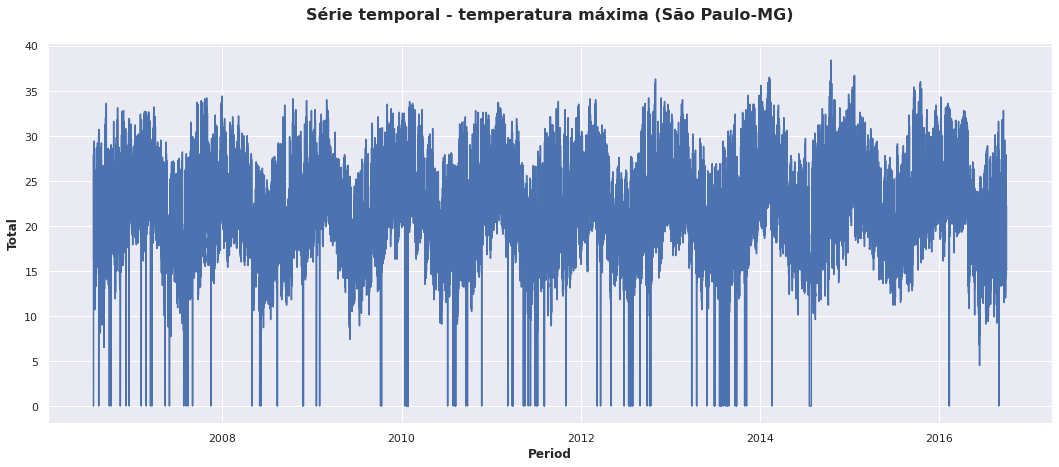

In [18]:
# plotando gráfico de linhas da série temporal da cidade de São Paulo
plt.figure(figsize=(18,7))

plt.title('Série temporal - temperatura máxima (São Paulo-MG)\n', 
          {'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Period', {'fontsize': 12, 'fontweight': 'bold'})
plt.ylabel('Total', {'fontsize': 12, 'fontweight': 'bold'})

plt.plot(data_SaoPaulo['mdct'], data_SaoPaulo['tmax']);

In [19]:
# # selecionando os dados da estação metereológica de Varginha-MG
data_Varginha = data[data['wsnm'] == 'VARGINHA']
data_Varginha.head()    # visualizando as 5 primeiras observações

,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,yr,mo,da,hr,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
1950984,323,VARGINHA,950.0,-21.566513,-45.4043,A515,Varginha,MG,2006-07-13 00:00:00,2006-07-13,2006,7,13,0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1950985,323,VARGINHA,950.0,-21.566513,-45.4043,A515,Varginha,MG,2006-07-13 01:00:00,2006-07-13,2006,7,13,1,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1950986,323,VARGINHA,950.0,-21.566513,-45.4043,A515,Varginha,MG,2006-07-13 02:00:00,2006-07-13,2006,7,13,2,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1950987,323,VARGINHA,950.0,-21.566513,-45.4043,A515,Varginha,MG,2006-07-13 03:00:00,2006-07-13,2006,7,13,3,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1950988,323,VARGINHA,950.0,-21.566513,-45.4043,A515,Varginha,MG,2006-07-13 04:00:00,2006-07-13,2006,7,13,4,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


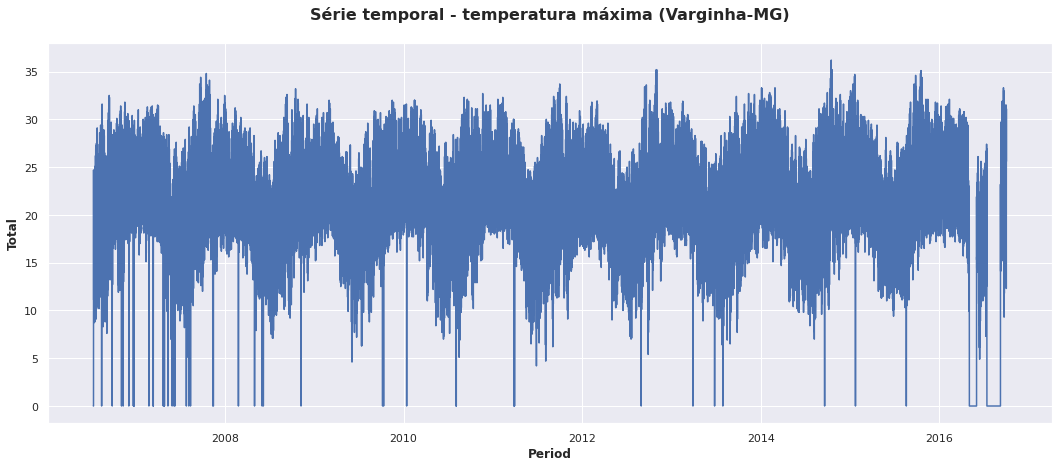

In [22]:
# plotando gráfico de linhas da série temporal da cidade de Varginha
plt.figure(figsize=(18,7))

plt.title('Série temporal - temperatura máxima (Varginha-MG)\n', 
          {'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Period', {'fontsize': 12, 'fontweight': 'bold'})
plt.ylabel('Total', {'fontsize': 12, 'fontweight': 'bold'})

plt.plot(data_Varginha['mdct'], data_Varginha['tmax']);

In [23]:
# criando uma coluna para aramzenar o resultado boleano da presença de zero em cada observação
data_Varginha['zero'] = data_Varginha['tmax'] == 0

# nome das colunas
data_Varginha.columns

Index(['wsid', 'wsnm', 'elvt', 'lat', 'lon', 'inme', 'city', 'prov', 'mdct',
       'date', 'yr', 'mo', 'da', 'hr', 'prcp', 'stp', 'smax', 'smin', 'gbrd',
       'temp', 'dewp', 'tmax', 'dmax', 'tmin', 'dmin', 'hmdy', 'hmax', 'hmin',
       'wdsp', 'wdct', 'gust', 'zero'],
      dtype='object')

In [24]:
# visualizando as 5 primeiras observações, 5 observações aleatórias e as 5 últimas observações
print(
    data_Varginha['zero'].head(),
    data_Varginha['zero'].sample(5),
    data_Varginha['zero'].tail(),
    sep='\n\n'
)

1950984    True
1950985    True
1950986    True
1950987    True
1950988    True
Name: zero, dtype: bool

1976760    False
1992043    False
2034068    False
2030248    False
2012918    False
Name: zero, dtype: bool

2040571    False
2040572    False
2040573    False
2040574    False
2040575    False
Name: zero, dtype: bool


In [25]:
# realizando um agrupamento dos atributos "date" e "zero" e contabilizando o resultado
zeros = data_Varginha.groupby('date')['zero'].sum()

# visualizando a quantidade de dados diferente de "zero"
print(
    zeros[zeros != 0].head(15),
    zeros[zeros != 0].tail(15), 
    sep='\n\n'
)

date
2006-07-13    16
2006-08-15     3
2006-09-28     2
2006-11-05     1
2006-11-11     2
2006-12-05     1
2006-12-23     6
2006-12-24     4
2006-12-25    21
2006-12-26    12
2007-02-25     1
2007-03-14     2
2007-04-24     1
2007-04-28     1
2007-04-29     1
Name: zero, dtype: int64

date
2016-08-23    24
2016-08-24    24
2016-08-25    24
2016-08-26    24
2016-08-27    24
2016-08-28    24
2016-08-29    24
2016-08-30    24
2016-08-31    24
2016-09-01    24
2016-09-02    24
2016-09-03    24
2016-09-04    24
2016-09-05    24
2016-09-06    13
Name: zero, dtype: int64


In [26]:
# contabilizando a quantidade de "zeros" por ano
data_Varginha.groupby(data_Varginha['date'].dt.year)['zero'].sum()

date
2006      68
2007      90
2008       7
2009      24
2010      10
2011       8
2012       3
2013      15
2014       4
2015       2
2016    2056
Name: zero, dtype: int64

> Mas o quanto isso representa (em %) para total de dados que deveria possuir em cada ano?

Lembrando que, já que a coleta é de _hora/hora_, portanto teremos 24 registros/dia e, isso multiplicado por 365 dias do ano, totalizando no final de um ano `8.760 registros`.

In [27]:
# contabilizando (%) o quanto os dados "zeros" representa para total de registros que deveria haver no ano
round((data_Varginha.groupby(data_Varginha['date'].dt.year)['zero'].sum() / (365 * 24)), 4) * 100

date
2006     0.78
2007     1.03
2008     0.08
2009     0.27
2010     0.11
2011     0.09
2012     0.03
2013     0.17
2014     0.05
2015     0.02
2016    23.47
Name: zero, dtype: float64

> Perceba que, os "zeros" por ano representa em grande parte por volta de _1%_ e, somente o ano de **2016** que temos mais de _23%_ de dados "zeros" em relação ao total de dados do ano.

E diante dessa constatação iremos realizar uma nova seleção dos dados até o ano de _2015_. E para os demais anos, iremos manter os zeros e explorar a robutez da biblioteca quanto a presença de `missing data`, já que o **PROPHET** "garante" que isso não é um problema para sua capacidade de predição.

In [28]:
# realizando a seleção da série temporal que seja menor que 2016
data_Varginha = data_Varginha[data_Varginha['date'] < '2016-01-01']

In [29]:
# visualizando o ano inicial e final da série temporal
data_Varginha['date'].dt.year.min(), data_Varginha['date'].dt.year.max()

(2006, 2015)

In [30]:
# realizando a seleção de dois atributos de entrada (data) e saída (registro)
tmax = data_Varginha[['mdct', 'tmax']]

# visualizando a seleção dos atributos
tmax

,mdct,tmax
1950984,2006-07-13 00:00:00,0.0
1950985,2006-07-13 01:00:00,0.0
1950986,2006-07-13 02:00:00,0.0
1950987,2006-07-13 03:00:00,0.0
1950988,2006-07-13 04:00:00,0.0
...,...,...
2033995,2015-12-31 19:00:00,29.7
2033996,2015-12-31 20:00:00,28.5
2033997,2015-12-31 21:00:00,27.3
2033998,2015-12-31 22:00:00,25.4


Como padrão, o _PROPHET_ somente aceita as colunas com os nomes de `ds` e `y` (quaisquer dúvidas consulte a documentação da biblioteca), portanto há necessidade de renomear as colunas para aplicação em nossa série temporal.

In [31]:
# renomeando as colunas
tmax.columns = ['ds', 'y']
tmax.columns    # nome das colunas

Index(['ds', 'y'], dtype='object')

In [32]:
# visualizando as 5 últimas observações
tmax.tail()

,ds,y
2033995,2015-12-31 19:00:00,29.7
2033996,2015-12-31 20:00:00,28.5
2033997,2015-12-31 21:00:00,27.3
2033998,2015-12-31 22:00:00,25.4
2033999,2015-12-31 23:00:00,23.3


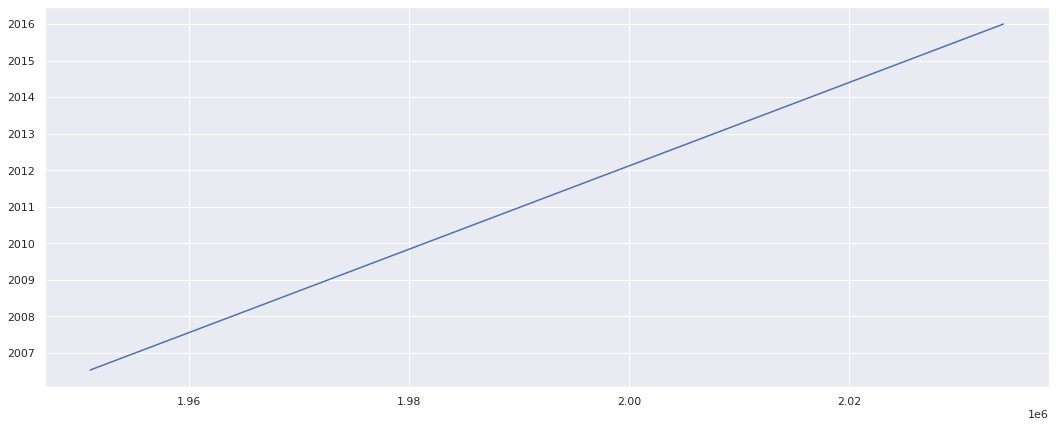

In [33]:
# gráfico de linha da série temporal
tmax['ds'].plot(figsize=(18,7));

Agora iremos separar os dados de treino e teste.

In [34]:
# separando os dados de treino e teste
train_data = tmax[tmax['ds'].dt.date == pd.to_datetime('2015-10-12')]
test_data = tmax[tmax['ds'].dt.date == pd.to_datetime('2015-10-13')]

> Lembrando que, os dados de treino é referente a um dia da _série temporal_, onde há 24 registros (um dado por hora - 24 horas/dia) e, os dados de teste é do dia subsequente aos dados de treino.

In [35]:
# visualizando a dimensão dos objetos
train_data.shape, test_data.shape

((24, 2), (24, 2))

In [36]:
# função para calcular opercentual do erro médio absoluto - mape
def mape(ytrue, ypred):
    ytrue = ytrue.values 
    ypred = ypred.values  
    return round(np.mean(np.abs((ytrue - ypred) / ytrue)), 4)

In [39]:
# visualizando o resultado do mape do "baseline"
print(f'Baseline: {mape(test_data.y, train_data.y)}')

Baseline: 0.0549


In [40]:
# instanciando o modelo
prophet_model = Prophet()

# treinando o modelo com os dados de treino
prophet_model.fit(train_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


Temos uma função muito útil no **Prophet**, que é a `.make_future_dataframe`, sua utilidade é realizar as predições futuras.

Para melhor entender sua aplicabilidade, vamos olhar a assinatura da função com o comando abaixo!

In [193]:
# visualizando a assinatura da função
?prophet_model.make_future_dataframe

Como argumentos da função passaremos os seguintes parâmetros:
- "period" (período da previsão), nesse caso 24 horas, ou seja, 1 dia;
- "freq" (frequência da previsão), aqui é de hora em hora e,
- "include_history", que caso seja de interesse, ele inclui os dados históricos que foram utilizados para realizar as predições

In [41]:
# instanciando os parâmetros da função e salvando o resultado no objeto "future"
future = prophet_model.make_future_dataframe(24, freq='H', include_history=False)

In [42]:
# visualizando a quantidade e os dados do objeto "future"
print('Quantidade de dados:', len(future), '\n')
future

Quantidade de dados: 24 



,ds
0,2015-10-13 00:00:00
1,2015-10-13 01:00:00
2,2015-10-13 02:00:00
3,2015-10-13 03:00:00
4,2015-10-13 04:00:00
5,2015-10-13 05:00:00
6,2015-10-13 06:00:00
7,2015-10-13 07:00:00
8,2015-10-13 08:00:00
9,2015-10-13 09:00:00


In [43]:
# realizando as predições com o modelo nos dados do objeto "future"
pred = prophet_model.predict(future)

In [46]:
# visualizando as 15 últimas predições realizadas com o modelo
pred['yhat'].tail(15)   # yhat - média das predições (ŷ)

9     33.574333
10    33.909405
11    34.244476
12    34.579548
13    34.914619
14    35.249691
15    35.584762
16    35.919833
17    36.254905
18    36.589976
19    36.925048
20    37.260119
21    37.595191
22    37.930262
23    38.265333
Name: yhat, dtype: float64

In [47]:
# contabilizando a quantidade de observações em cada objeto
len(test_data), len(pred)

(24, 24)

In [48]:
# utilizando a função "mape" para calcular o percentual do erro médio absoluto
mape(test_data['y'], pred['yhat'])

0.393

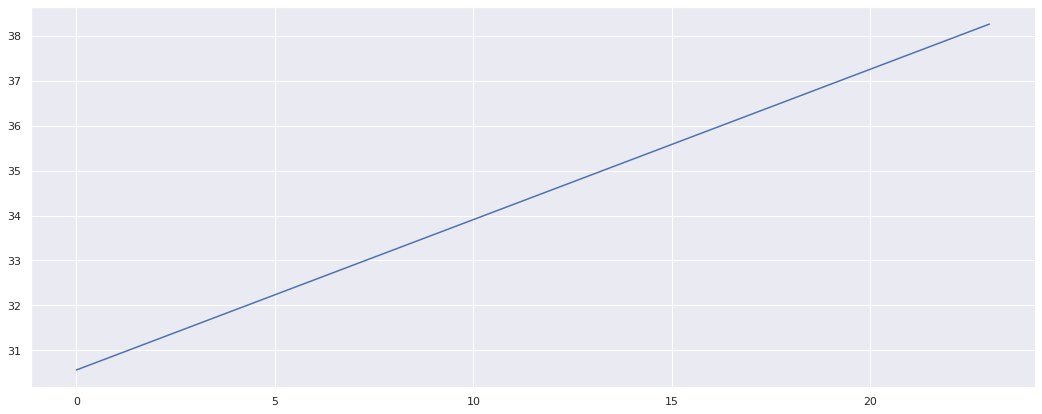

In [49]:
# gráfico de linha da série temporal
pred['yhat'].plot(figsize=(18,7));

Vamos utilizar a função `.date_range` do **Pandas** que cria uma frequência de observações dado um intervalo de interesse. E, juntamente com a função `.isin` iremos selecionar novos dados para treino do modelo.

In [50]:
# instanciando uma série temporal de 1 dia
train_data_2 = tmax[tmax['ds'].isin(pd.date_range('2015-10-12', '2015-10-13 23:59:00', freq='H'))]

In [51]:
# definindo uma função para otimizar a aplicação do Prophet
def run_prophet(train_data, test_data):
    prophet_model = Prophet()
    prophet_model.fit(train_data)

    future = prophet_model.make_future_dataframe(24, freq='H', include_history=False)
    forecast = prophet_model.predict(future)

    return prophet_model, forecast, mape(test_data['y'], forecast['yhat'])

In [52]:
# aplicando a função "run_prophet" no objeto "train_data_2" e nos dados de teste (test_data)
result_2 = run_prophet(train_data_2, test_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [53]:
# visualizando o endereço de memória do modelo
result_2[0]

In [54]:
# visualizando as 15 últimas predições realizadas pelo modelo
result_2[1]['yhat'].tail(15)    # yhat - média das predições (ŷ)

9     27.793525
10    27.852499
11    27.911473
12    27.970446
13    28.029420
14    28.088394
15    28.147367
16    28.206341
17    28.265315
18    28.324288
19    28.383262
20    28.442235
21    28.501209
22    28.560183
23    28.619156
Name: yhat, dtype: float64

In [55]:
# calculando o percentual do erro médio absoluto
result_2[2]

0.1847

In [56]:
# instanciando outra série temporal, nesse caso, de 7 dias
train_data_3 = tmax[tmax['ds'].isin(pd.date_range('2015-10-06', '2015-10-13 23:59:00', freq='H'))]

In [57]:
# aplicando novamente a função para treinar e calcular a métrica dessa nova série temporal de 7 dias
result_3 = run_prophet(train_data_3, test_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [58]:
# calculando o percentual do erro médio absoluto
result_3[2]

0.0334

In [59]:
# instanciando uma nova série temporal de 10 dias
train_data_4 = tmax[tmax['ds'].isin(pd.date_range('2015-10-03', '2015-10-13 23:59:00', freq='H'))]

In [60]:
# aplicando a função 
result_4 = run_prophet(train_data_4, test_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [61]:
# visualizando o resultada do percentual do erro médio absoluto
result_4[2]

0.0213

<font size=4>**Previsão para 10 dias**</font>

In [62]:
# instanciando um novo objeto de intervalo de 10 dias
train_data_10d = tmax[tmax['ds'].isin(pd.date_range('2015-10-03', '2015-10-13 23:59:00', freq='H'))]

# aplicando a função para rodar o modelo e, salvando cada resultado em objeto distinto
prophet_model_10d, forecast_10, error_10d = run_prophet(train_data_10d, test_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [63]:
# visualizando o resultado do erro médio absoluto
error_10d

0.0213

In [64]:
# visualizando os valores reais do dados de teste
test_data['y']

2032080    25.2
2032081    24.4
2032082    24.0
2032083    23.7
2032084    23.1
2032085    20.5
2032086    20.2
2032087    19.7
2032088    19.5
2032089    18.5
2032090    19.2
2032091    21.8
2032092    24.5
2032093    25.9
2032094    28.0
2032095    29.6
2032096    30.2
2032097    32.0
2032098    31.7
2032099    31.4
2032100    31.1
2032101    29.9
2032102    27.0
2032103    25.6
Name: y, dtype: float64

In [69]:
# viusualizando as datas dos dados de teste
test_data['ds']

2032080   2015-10-13 00:00:00
2032081   2015-10-13 01:00:00
2032082   2015-10-13 02:00:00
2032083   2015-10-13 03:00:00
2032084   2015-10-13 04:00:00
2032085   2015-10-13 05:00:00
2032086   2015-10-13 06:00:00
2032087   2015-10-13 07:00:00
2032088   2015-10-13 08:00:00
2032089   2015-10-13 09:00:00
2032090   2015-10-13 10:00:00
2032091   2015-10-13 11:00:00
2032092   2015-10-13 12:00:00
2032093   2015-10-13 13:00:00
2032094   2015-10-13 14:00:00
2032095   2015-10-13 15:00:00
2032096   2015-10-13 16:00:00
2032097   2015-10-13 17:00:00
2032098   2015-10-13 18:00:00
2032099   2015-10-13 19:00:00
2032100   2015-10-13 20:00:00
2032101   2015-10-13 21:00:00
2032102   2015-10-13 22:00:00
2032103   2015-10-13 23:00:00
Name: ds, dtype: datetime64[ns]

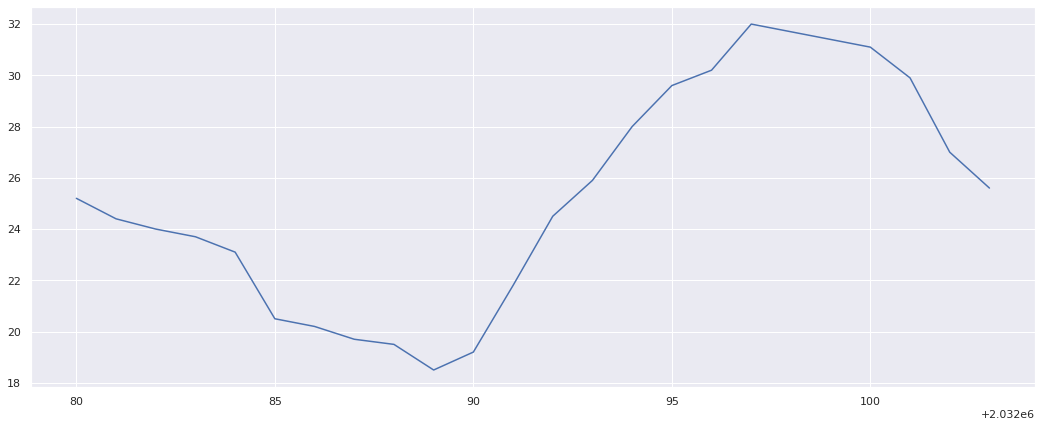

In [70]:
# distribuição dos dados da série temporal 
test_data['y'].plot(figsize=(18,7));

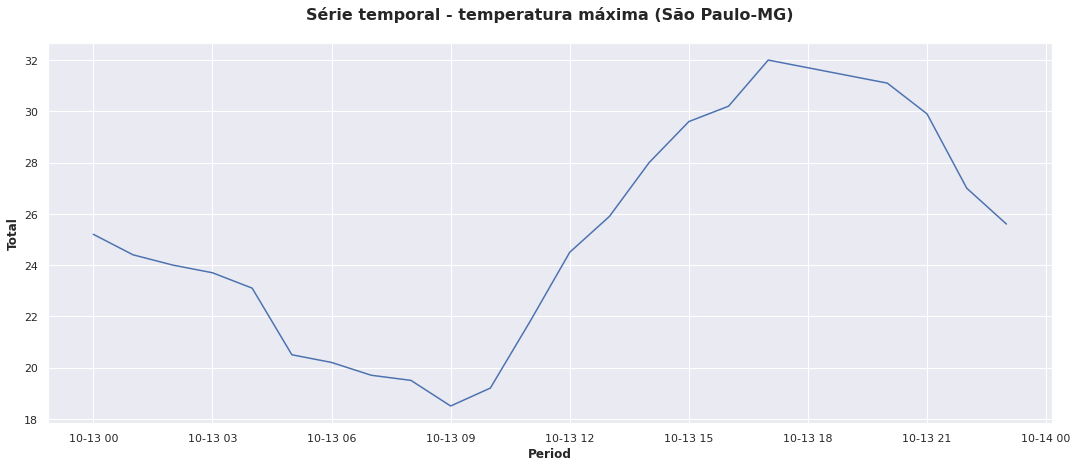

In [71]:
# plotando gráfico de linhas da série temporal
plt.figure(figsize=(18,7))

plt.title('Série temporal - temperatura máxima (São Paulo-MG)\n', 
          {'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Period', {'fontsize': 12, 'fontweight': 'bold'})
plt.ylabel('Total', {'fontsize': 12, 'fontweight': 'bold'})

plt.plot(test_data['ds'], test_data['y']);

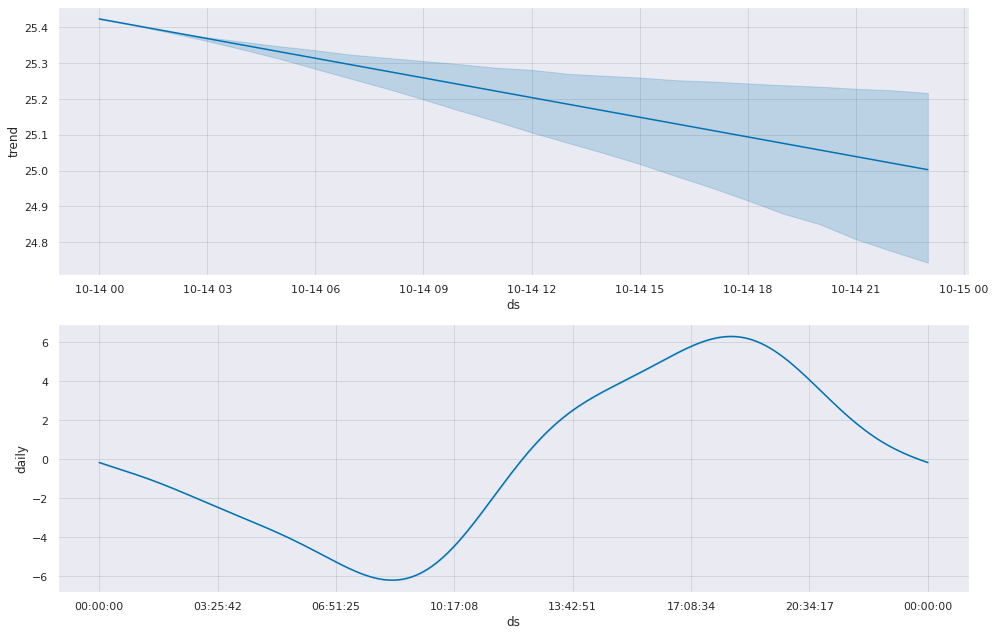

In [72]:
# visualizando a tendência e a distribuição das previsões do "prophet_model_10d"
prophet_model_10d.plot_components(forecast_10, figsize=(14,9));

<font size=4>**Cross validation**</font>

In [73]:
# instanciando um novo objeto e o intervalo da série temporal de 12 meses
train_final = tmax[tmax['ds'].isin(pd.date_range('2014-01-01', '2014-12-31', freq='H'))]

In [74]:
# utilizando a função "run_prophet" para aplicação do Prophet e salvando os resultados em objetos distintos
prophet_model_2014, forecast_2014, error_2014 = run_prophet(train_final, test_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [75]:
# visualizando o erro do modelo
error_2014

0.0993

In [76]:
# importando função para realizar a validação cruzada
from fbprophet.diagnostics import cross_validation

**Argumentos:**
- "initial": quantos dias que será utlizados para realizar a previsão
- "period": quantos dias que o modelo irar pular para realizar a nova previsão
- "horizon": quantos dias que o modelo irar prever

In [77]:
# aplicando a validação cruzada e salvando o resultado no objeto "df_cv"
df_cv = cross_validation(prophet_model_2014, initial='28 days', period='7 days', horizon='7 days')

# visualizando as 5 primeiras linhhas do objeto "df_cv"
df_cv.head()

INFO:fbprophet:Making 48 forecasts with cutoffs between 2014-01-29 00:00:00 and 2014-12-24 00:00:00


  0%|          | 0/48 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-01-29 01:00:00,23.523068,21.852045,25.249655,23.8,2014-01-29
1,2014-01-29 02:00:00,23.065750,21.375310,24.913473,23.8,2014-01-29
2,2014-01-29 03:00:00,22.758457,21.000992,24.596989,23.0,2014-01-29
3,2014-01-29 04:00:00,22.335511,20.632987,24.089986,22.7,2014-01-29
4,2014-01-29 05:00:00,21.688224,20.000139,23.348361,21.2,2014-01-29


In [78]:
(df_cv['ds'] - pd.Timedelta(7, 'D')).dt.weekday

0       2
1       2
2       2
3       2
4       2
       ..
8059    1
8060    1
8061    1
8062    1
8063    2
Name: ds, Length: 8064, dtype: int64

In [79]:
# importando função para cálculo das métricas
from fbprophet.diagnostics import performance_metrics

In [80]:
# visualizando as métricas
performance_metrics(df_cv)

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,0 days 17:00:00,4.789230,2.188431,1.666214,0.064972,0.730407
1,0 days 18:00:00,4.932585,2.220942,1.689801,0.064972,0.725445
2,0 days 19:00:00,5.118352,2.262377,1.721998,0.065816,0.718724
3,0 days 20:00:00,5.307833,2.303874,1.762990,0.066537,0.708333
4,0 days 21:00:00,5.517118,2.348855,1.802261,0.066537,0.701096
...,...,...,...,...,...,...
147,6 days 20:00:00,11.099113,3.331533,2.636901,0.108289,0.576148
148,6 days 21:00:00,11.273873,3.357659,2.661691,0.107264,0.576096
149,6 days 22:00:00,11.336955,3.367039,2.678188,0.107112,0.567670
150,6 days 23:00:00,11.365333,3.371251,2.688959,0.107480,0.565964


In [81]:
# excluindo os dados nulos do conjunto de dados
df_cv_without_zeros = df_cv[df_cv['y'] != 0]

# realizando o cálculo das métricas
performance = performance_metrics(df_cv_without_zeros)

# visualizando os resultados das previsões
performance.sort_values('horizon')

,horizon,mse,rmse,mae,mape,mdape,coverage
0,0 days 17:00:00,4.789230,2.188431,1.666214,0.089409,0.064972,0.730407
1,0 days 18:00:00,4.932585,2.220942,1.689801,0.089007,0.064972,0.725445
2,0 days 19:00:00,5.118352,2.262377,1.721998,0.088849,0.065212,0.718724
3,0 days 20:00:00,5.307833,2.303874,1.762990,0.088797,0.065964,0.708333
4,0 days 21:00:00,5.517118,2.348855,1.802261,0.088647,0.066702,0.701096
...,...,...,...,...,...,...,...
147,6 days 20:00:00,11.099113,3.331533,2.636901,0.133449,0.108289,0.576148
148,6 days 21:00:00,11.273873,3.357659,2.661691,0.131946,0.107419,0.576096
149,6 days 22:00:00,11.336955,3.367039,2.678188,0.130649,0.107480,0.567670
150,6 days 23:00:00,11.365333,3.371251,2.688959,0.129161,0.107112,0.565964


In [82]:
# visualizando o valor mínimo, máximo e a média do "mape"
performance['mape'].min(), performance['mape'].max(), performance['mape'].mean()

(0.07946915555504919, 0.1428539814790399, 0.117587776867046)

In [83]:
# importando função para realizar o plot do gráfico da validação cruzada
from fbprophet.plot import plot_cross_validation_metric

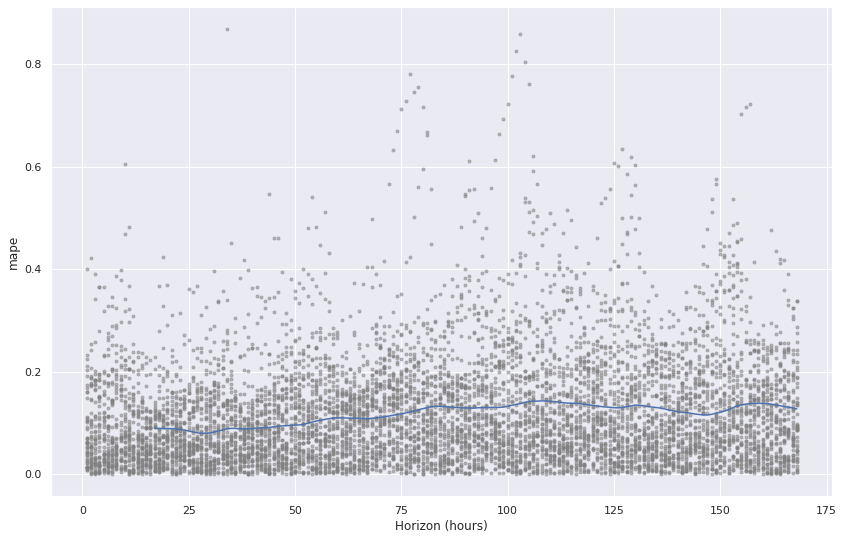

In [84]:
# plotando o gráfico da validação cruzada da métrica "mape"
plot_cross_validation_metric(df_cv_without_zeros, 'mape', figsize=(14,9));

In [85]:
# modelo baseline
baseline_yhat = []  # lista para salvar os resultados

# realizando um laço de repetição no objeto "df_cv_without_zeros"
for date in (df_cv_without_zeros['ds'] - pd.Timedelta(7, 'D')):
    baseline_yhat.append(train_final[train_final['ds'] == date]['y'].values[0])

In [86]:
# salvando o resultado no atributo "baseline"
df_cv_without_zeros['baseline'] = baseline_yhat

In [87]:
# calculando o "mape" do baseline
mape(df_cv_without_zeros['y'], df_cv_without_zeros['baseline'])

0.1374

In [88]:
# calculando o "mape" do prophet
mape(df_cv_without_zeros['y'], df_cv_without_zeros['yhat'])

0.1165

Pra fim de curiosidade, vamos criar um `"mini ensembles"` com os modelos - _baseline_ e _prophet_.

In [89]:
# criando um "mini ensemble" com os modelos baseline (10%) e prophet (90%)
mape(df_cv_without_zeros['y'], 0.1 * df_cv_without_zeros['baseline'] + 0.9 * df_cv_without_zeros['yhat'])

0.1159

In [90]:
# criando um "mini ensemble" com os modelos baseline (15%) e prophet (85%)
mape(df_cv_without_zeros['y'], 0.15 * df_cv_without_zeros['baseline'] + 0.85 * df_cv_without_zeros['yhat'])

0.1158

In [91]:
# criando um "mini ensemble" com os modelos baseline (20%) e prophet (80%)
mape(df_cv_without_zeros['y'], 0.2 * df_cv_without_zeros['baseline'] + 0.8 * df_cv_without_zeros['yhat'])

0.1159

<font size=4>**Outros**</font>

Instalando a biblioteca `session_info` para salvar as versões das bibliotecas e/ou funções utilizadas no _notebook_.

In [92]:
!pip install session_info

     |████████████████████████████████| 63 kB 1.4 MB/s 
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8048 sha256=627b1cc79a63f69d46b808b52a2de80e6553e230f60933508294ff6ec0df4893
  Stored in directory: /root/.cache/pip/wheels/bd/ad/14/6a42359351a18337a8683854cfbba99dd782271f2d1767f87f
Successfully built session-info


In [93]:
# importando a biblioteca
import session_info

# visualizando as versões das bibliotecas utilizadas
session_info.show(html=False)

-----
fbprophet           0.7.1
google              NA
matplotlib          3.2.2
numpy               1.21.5
pandas              1.3.5
seaborn             0.11.2
session_info        1.0.0
-----
IPython             5.5.0
jupyter_client      5.3.5
jupyter_core        4.9.2
notebook            5.3.1
-----
Python 3.7.12 (default, Jan 15 2022, 18:48:18) [GCC 7.5.0]
Linux-5.4.144+-x86_64-with-Ubuntu-18.04-bionic
-----
Session information updated at 2022-03-07 01:27
